# Importing Libraries and modules

In [56]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [200]:
import os
import cv2
import gc
import PIL
import uuid
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm  # Progress bar
import tensorflow as tf
import keras
from sklearn.utils import shuffle
from keras.optimizers import Adam
from keras.regularizers import l1_l2
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import LearningRateScheduler
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from sklearn.model_selection import train_test_split

In [201]:
def plot_smaples(sample, row=15, col=15):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:5]):
        cropped_images_show = PIL.Image.open(file)
        gray_img= cropped_images_show.convert("L")
        plt.subplot(1,5,i+1)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
    plt.show()

In [202]:
target_size = (224, 224, 3)

In [203]:
def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    if image_path:
#         absolute_image_path = os.path.abspath(image_path)
        image = cv2.imread(image_path)
        
        # Check if the image was loaded successfully
        if image is None:
#             print(f"Warning: Failed to load image at {absolute_image_path}. Skipping this file.")
            return None

        # Resize the image and normalize it
        image = cv2.resize(image, (target_size[0], target_size[1]))
        image_array = image / 255.0  # Normalize the image to range [0, 1]
        return image_array
    else:
        return None

In [235]:
valid_extensions = ('.jpg', '.jpeg', '.png')  # Specify the valid image extensions

benign_images = np.array([image_processor(os.path.join(path_zero, x), (224, 224)) 
                           for x in os.listdir(path_zero) 
                           if x.lower().endswith(valid_extensions)])
benign_labels = np.array([0] * len(benign_images))

malignant_images = np.array([image_processor(os.path.join(path_one, x), (224, 224)) 
                              for x in os.listdir(path_one) 
                              if x.lower().endswith(valid_extensions)])
malignant_labels = np.array([1] * len(malignant_images))


In [236]:
def safe_image_processor(filepath, size):
    try:
        return image_processor(filepath, size)
    except Exception as e:
        print(f"Error processing {filepath}: {e}")
        return None  # Or handle it in a way that fits your needs

benign_images = np.array([safe_image_processor(os.path.join(path_zero, x), (224, 224)) 
                           for x in os.listdir(path_zero) 
                           if x.lower().endswith(valid_extensions)])
benign_images = benign_images[~np.array([img is None for img in benign_images])]  # Remove None entries
benign_labels = np.array([0] * len(benign_images))

malignant_images = np.array([safe_image_processor(os.path.join(path_one, x), (224, 224)) 
                              for x in os.listdir(path_one) 
                              if x.lower().endswith(valid_extensions)])
malignant_images = malignant_images[~np.array([img is None for img in malignant_images])]  # Remove None entries
malignant_labels = np.array([1] * len(malignant_images))


In [237]:
path_zero = 'C:\\Users\\user\\Downloads\\hackaton\\test\\0'  # benign
path_one = 'C:\\Users\\user\\Downloads\\hackaton\\test\\1'   # malignant

# Preprocess and collect images and labels
benign_images = np.array([image_processor(os.path.join(path_zero, x), (224, 224)) for x in os.listdir(path_zero)])
benign_labels = np.array([0] * len(benign_images))  # Label 0 for benign

malignant_images = np.array([image_processor(os.path.join(path_one, x), (224, 224)) for x in os.listdir(path_one)])
malignant_labels = np.array([1] * len(malignant_images))  # Label 1 for malignant
print(len(benign_images))

208


In [239]:
print(len(os.listdir(path_zero)))  # List all files in the benign directory
   # List all files in the malignant directory


208


In [241]:
# Confirm that files are images with specific extensions
valid_extensions = ('.jpg', '.jpeg', '.png')

benign_files = [f for f in os.listdir(path_zero) if f.lower().endswith(valid_extensions)]
malignant_files = [f for f in os.listdir(path_one) if f.lower().endswith(valid_extensions)]

print(f"Filtered benign files count: {len(benign_files)}")
print(f"Filtered malignant files count: {len(malignant_files)}")



Filtered benign files count: 208
Filtered malignant files count: 128


In [245]:
benign_files = [f for f in benign_files if not f.startswith('.')]
malignant_files = [f for f in malignant_files if not f.startswith('.')]

len(benign_files)


208

In [205]:
print(f"The Count of 0 is: {benign_images.shape}\n")#224x224 pixels with 3 color channels (RGB)
print(f"The count of 0 label is: {benign_labels.shape}\n")
print(f"The count of 1 is: {malignant_images.shape}\n")
print(f"The count of 1 label is: {malignant_labels.shape}\n")

The Count of 0 is: (208, 224, 224, 3)

The count of 0 label is: (208,)

The count of 1 is: (128, 224, 224, 3)

The count of 1 label is: (128,)



In [206]:
len(benign_images)<len(malignant_images)

False

In [207]:
diff_cases = max(len(benign_images), len(malignant_images)) - min(len(benign_images), len(malignant_images))

In [208]:
print(f"the difference is : {diff_cases}")

the difference is : 80


In [209]:
#for image augmentation
datagen = ImageDataGenerator(rotation_range=25,     # randomly rotate images in the range (degrees, 0 to 180)
                             zoom_range = 0.3,      # Randomly zoom image 
                             width_shift_range=0.2, # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,# randomly shift images vertically (fraction of total height)
                             horizontal_flip=True,  # randomly flip images
                             fill_mode='nearest')  

In [210]:
# Augment the data and increase the dataset size
augment_size = diff_cases  # the data is large and we do not need many images

augmented_images_iter = datagen.flow(malignant_images, malignant_labels, batch_size=32, shuffle=False)

augmented_images = []

# Get augmented images and labels
for sample in range(augment_size // 32):
    image_batch, _ = next(augmented_images_iter)
    for img in image_batch:  # Iterate through each image in the batch
        augmented_images.append(img)  # Append individual images to the list

augmented_images = np.array(augmented_images)

# Combine with original data
train_images_augmented = np.concatenate((malignant_images, augmented_images), axis=0)
train_labels_augmented = np.concatenate((np.full(len(malignant_images), 1), np.full(len(augmented_images), 1)), axis=0)

# Print the shape of the data before and after augmentation
print("Shape of malignant_images before augmentation:", malignant_images.shape)
print("Shape of train_labels before augmentation:", len(malignant_images))
print("Shape of train_images after augmentation:", train_images_augmented.shape)
print("Shape of train_labels after augmentation:", train_labels_augmented.shape)

Shape of malignant_images before augmentation: (128, 224, 224, 3)
Shape of train_labels before augmentation: 128
Shape of train_images after augmentation: (192, 224, 224, 3)
Shape of train_labels after augmentation: (192,)


In [211]:
del augmented_images_iter, augment_size, augmented_images#delete for space optimization

In [212]:
# Remove None values (in case some images failed to load)
benign_images = [img for img in benign_images if img is not None]
malignant_images = [img for img in malignant_images if img is not None]

In [213]:
# Concatenate images and labels
full_images = np.concatenate([benign_images, train_images_augmented])
full_labels = np.concatenate([benign_labels, train_labels_augmented])
print("Preprocessing complete. Images and labels combined.")

Preprocessing complete. Images and labels combined.


In [214]:
del benign_images, malignant_images, benign_labels, malignant_labels, train_images_augmented, train_labels_augmented
gc.collect()

30006

In [215]:
def augment_data(images, labels, augmentation_times=2):
    augmented_images = []
    augmented_labels = []

    for _ in range(augmentation_times):
        for x_batch, y_batch in datagen.flow(images, labels, batch_size=len(images), shuffle=False):
            augmented_images.extend(x_batch)
            augmented_labels.extend(y_batch)
            break  # to ensure only one batch per loop

    # Combine original and augmented data
    combined_images = np.concatenate([images] + [np.array(augmented_images) for _ in range(augmentation_times)], axis=0)
    combined_labels = np.concatenate([labels] + [np.array(augmented_labels) for _ in range(augmentation_times)], axis=0)
    
    return combined_images, combined_labels

In [216]:
augment_data(full_images,full_labels)

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [217]:
# Shuffle the dataset (images and labels in unison)
full_images, full_labels = shuffle(full_images, full_labels, random_state=42)

In [218]:
num_classes = 2

In [219]:
train_images, valid_images, train_labels, valid_labels = train_test_split(full_images, 
                                                                          full_labels,
                                                                          test_size=0.2,
                                                                          random_state=40)

In [220]:
del full_images, full_labels
gc.collect()

0

In [221]:
print("Train:")
print(train_images.shape)
print(train_labels.shape)
print("Valid:")
print(valid_images.shape)
print(valid_labels.shape)

Train:
(320, 224, 224, 3)
(320,)
Valid:
(80, 224, 224, 3)
(80,)


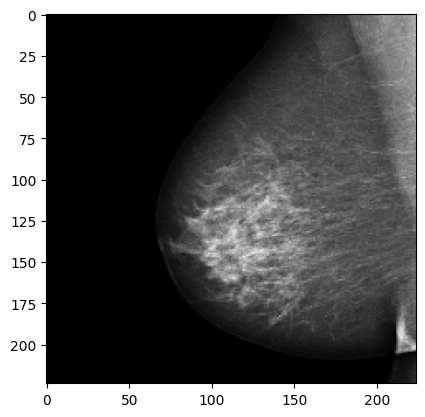

In [222]:
plt.imshow(train_images[0])
plt.show()

In [223]:
train_labels = to_categorical(train_labels, num_classes)
# test_labels  = to_categorical(test_labels, num_classes)
valid_labels = to_categorical(valid_labels, num_classes)


In [224]:
#train_labels = to_categorical(train_labels, num_classes)
#valid_labels = to_categorical(valid_labels, num_classes)
print(train_labels.shape)

(320, 2)


In [225]:
# Load pre-trained InceptionV3 model
model = InceptionV3(weights='imagenet', include_top=False)

In [226]:
print("Train images:", train_images is not None)
print("Train labels:", train_labels is not None)
print("Validation images:", valid_images is not None)
print("Validation labels:", valid_labels is not None)


Train images: True
Train labels: True
Validation images: True
Validation labels: True


In [227]:
print(train_labels.shape)  # Should be (num_samples, 2)
print(valid_labels.shape)  # Should be (num_samples, 2)


(320, 2)
(80, 2)


In [228]:
# Define regularization parameters
l1_reg = 0.001
l2_reg = 0.001
dropout_rate = 0.2

# Add new classification layers with regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(x)
x = Dropout(dropout_rate)(x)  # Dropout layer to prevent overfitting
predictions = Dense(2, activation='softmax')(x)

# Combine base model with new classification layers
model = Model(inputs=base_model.input, outputs=predictions)

In [229]:
initial_learning_rate = 0.00001
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [230]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define training parameters
batch_size = 32
max_epochs = 50
num_iterations = 76

In [231]:
history = model.fit(train_images,
                    train_labels,
                    batch_size=batch_size,
                    epochs=max_epochs,
                    steps_per_epoch=num_iterations,
                    validation_data=(valid_images, valid_labels), 
                    callbacks=[early_stopping])

Epoch 1/50
10/76 ━━━━━━━━━━━━━━━━━━━━ 4:31 4s/step - accuracy: 0.5123 - loss: 26.9056

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


76/76 ━━━━━━━━━━━━━━━━━━━━ 91s 585ms/step - accuracy: 0.4473 - loss: 24.7680 - val_accuracy: 0.4750 - val_loss: 26.8817
Epoch 2/50
 3/76 ━━━━━━━━━━━━━━━━━━━━ 5:02 4s/step - accuracy: 0.5833 - loss: 26.7844

KeyboardInterrupt: 

In [140]:
print(train_labels.shape)  # Should be (num_samples, 2)
print(valid_labels.shape)  # Should be (num_samples, 2)


(320, 2)
(80, 2)


In [142]:
print(train_images.shape,train_labels.shape,valid_images.shape,valid_labels.shape)

(320, 224, 224, 3) (320, 2) (80, 224, 224, 3) (80, 2)


In [143]:
#base_model.summary()